BoutInf (nBoutsx18):
- Columns 1 and 2: the start and end of the bout data in the continuous data variables
- Column 3: Number indicating the stimulus being shown during that bout
- Column 4: Original frame start number (allows actual timing of bout to be known, given 700 Hz frame rate)
- Columns 5:7 Pre-bout x, y position and theta in pixels and radians (???)
- Column 8: Eye Convergence during bout (2: converged; 1: not converged)
- Column 9: Change in eye convergence angle (degrees) during bout
- Column 10: Assigned eye convergence category (1=converge during  bout; 2=not converged ;  3=converged; 4=diverge during bout)
- Column 11: Bout category assigned using the scheme in Marques et al. 2018 (1=SCS; 2=LCS; 3=BS; 4=O-bend; 5=J-turn; 6=SLC; 7=S1; 8=RT; 9=S2; 10=LLC; 11=AS; 12=SAT; 13=HAT)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import DATA_DIR, ensure_dir, ZEBRAFISH_DIR
import urllib.request
ZEBRAFISH_DIR

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/raw/ZEBRAFISH_Data_Dir')

In [3]:
from tqdm.autonotebook import tqdm
import h5py
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
mat_files = list(ZEBRAFISH_DIR.glob('**/*.mat'))

In [5]:
len(mat_files)

650

In [6]:
mat_files[0]

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/raw/ZEBRAFISH_Data_Dir/Phototaxis/Phototaxis4/Phototaxis400004.mat')

In [7]:
bout_df = pd.DataFrame(columns = ['mat_loc', 'bouts', 'bout_lens'])
for mfi, mat_file in enumerate(tqdm(mat_files)):
    ds = scipy.io.loadmat(mat_file.as_posix())
    BoutInf = ds['boutStructure'][0][0][0]
    bout_category = BoutInf[:,-1].astype('int')
    bout_df.loc[len(bout_df)] = [mat_file.as_posix(), bout_category, len(bout_category)]

In [16]:
bout_df[:3]

,mat_loc,bouts,bout_lens
0,/mnt/cube/tsainbur/Projects/github_repos/child...,"[12, 8, 9, 8, 7, 7, 8, 8, 13, 7, 8, 8, 8, 8, 8...",1808
1,/mnt/cube/tsainbur/Projects/github_repos/child...,"[13, 7, 12, 7, 9, 9, 9, 8, 13, 7, 7, 7, 8, 7, ...",1528
2,/mnt/cube/tsainbur/Projects/github_repos/child...,"[7, 8, 12, 8, 9, 7, 9, 9, 7, 9, 7, 7, 5, 8, 7,...",2296


In [17]:
len(bout_df)

650

In [18]:
np.unique(np.concatenate(bout_df.bouts.values))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [19]:
np.sum(bout_df.bout_lens)

1869270

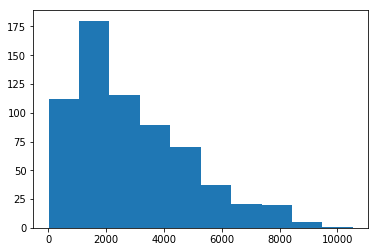

In [20]:
plt.hist(bout_df.bout_lens.values.astype('int'));

In [31]:
import seaborn as sns
from childes_mi.utils.paths import DATA_DIR, FIGURE_DIR, ensure_dir
from childes_mi.utils.general import flatten,save_fig
ensure_dir(FIGURE_DIR/ 'distributions')

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


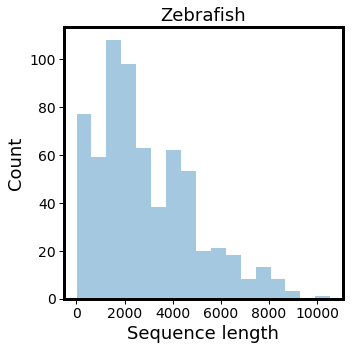

In [32]:
sns.set_context("paper", rc={"font.size":24,"axes.titlesize":18,"axes.labelsize":18})   

fig, ax = plt.subplots(figsize=(5,5));
p = sns.distplot(bout_df.bout_lens.values.astype('int'), kde=False, rug=False, ax = ax);
#ax.set_xlim([0,1000])
ax.set_xlabel('Sequence length')
ax.set_title('Zebrafish')
ax.set_ylabel('Count')
p.tick_params(labelsize=14)
for sp in ax.spines.items():
    sp[1].set_linewidth(3)  
save_fig(FIGURE_DIR/ 'distributions' / 'zebrafish_distribution')
plt.show()

### Mutual information

In [21]:
bouts = [list(i.astype('int'))  for i in bout_df.bouts.values]

In [30]:
bout_df.iloc[0].mat_loc

'/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/raw/ZEBRAFISH_Data_Dir/Phototaxis/Phototaxis4/Phototaxis400004.mat'

In [28]:
n=8
x = [behavior_dict[i] for i in bouts[0]]
lst = []
for i in range(0,len(x),n):
    lst.append(x[i:i+n])
for l in lst:
    print(' '.join([str(i) for i in l]))

SAT RT S2 RT S1 S1 RT RT
HAT S1 RT RT RT RT RT RT
RT RT S1 S1 HAT RT SAT S2
S2 RT RT RT S2 RT S2 S2
HAT RT SAT RT S1 RT S1 S2
HAT S1 HAT S1 S1 S1 RT S1
HAT RT HAT HAT S2 RT HAT S2
S2 RT RT S1 S2 RT S2 RT
S1 RT SAT S2 SAT RT RT S2
S2 O-bend S1 S2 RT S2 RT S2
RT S2 S2 RT S2 S2 S2 RT
S2 S2 S2 S1 S1 RT RT HAT
RT S2 S1 S2 S2 S2 RT RT
S2 S1 RT RT S2 S2 S2 S2
RT S2 RT RT S2 RT RT S2
RT RT S2 S2 S2 S2 S2 S2
RT S2 HAT HAT RT S1 S2 RT
SAT S2 S2 S2 S2 RT S1 RT
S1 RT S1 S2 S2 S2 S1 S2
S2 S2 J-turn HAT S2 RT S2 S1
S2 RT RT S2 RT RT HAT S2
O-bend HAT S1 S2 S2 S2 S2 S2
S2 S2 S2 RT RT S2 RT HAT
S2 S1 S1 RT RT RT RT RT
RT HAT RT S2 RT RT HAT S1
S1 S1 RT S2 S2 RT S2 SAT
S2 S2 S1 S2 J-turn RT RT HAT
RT S2 S2 S2 HAT RT S2 S2
S2 S2 S2 HAT S1 RT HAT S1
S1 S2 AS HAT S1 S2 S1 RT
HAT RT S1 S1 RT S1 S2 S2
RT RT S2 S1 S2 S2 S1 J-turn
S2 S2 RT RT S1 S1 S2 RT
S2 S1 HAT S1 AS RT RT RT
S2 S2 HAT AS RT S2 RT S1
RT S2 RT S2 RT RT RT S1
S1 S1 S2 HAT S1 AS RT HAT
RT RT S2 S2 S2 S2 RT S2
RT HAT S2 RT S2 RT S2 S2
RT HAT S

In [14]:
def remove_repeats(sequence):
    return [element for i, element in enumerate(sequence[1:]) if sequence[i] != element]

In [15]:
behavior_dict = {
    1:"SCS", # short capture swims
    2:"LCS", # short capture swims
    3:"BS", # burst type forward swim with high tail-beat frequency (BS)
    4:"O-bend", # O-bends
    5:"J-turn",
    6:"SLC", # fast C-start escape swims (SLC)
    7:"S1",
    8:"RT", # routine turns (RTs)
    9:"S2",
    10:"LLC", # long latency C-starts (LLC)
    11:"AS", # “approach swims” (ASs)
    12:"SAT", # spot avoidance turn (SAT)
    13:"HAT", # high-angle turn (HAT)
}